# Averaged Prediction over entire cohort

In [69]:
root_path = '/nvme/merengelke/aipal/'
cities_countries = ['poland', 'rome', 'salamanca', 'sao_paulo', 'turkey']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df = pd.concat([df, df_small])
    
# age over 18
df = df[df['age'] > 18]

Shape of SHAP values: (826, 10, 3)
Mean SHAP values for class ALL:
Fibrinogen_g_L: 0.03526042401790619
MCV_fL: -0.024219615384936333
Monocytes_percent: -0.2547606825828552
LDH_UI_L: 0.03725408762693405
PT_percent: -0.1930164396762848
MCHC_g_L: 0.20080052316188812
Lymphocytes_G_L: 0.011541405692696571
age: 0.008055873215198517
Monocytes_G_L: -0.08249843865633011
Platelets_G_L: -0.047210078686475754
Mean SHAP values for class AML:
Fibrinogen_g_L: 0.05262720212340355
MCV_fL: -0.01805204525589943
Monocytes_percent: 0.2956351935863495
LDH_UI_L: 0.0033354610204696655
PT_percent: 0.023820186033844948
MCHC_g_L: -0.0918603390455246
Lymphocytes_G_L: -0.02589656040072441
age: -0.06211842969059944
Monocytes_G_L: 0.18474611639976501
Platelets_G_L: -0.005832594819366932
Mean SHAP values for class APL:
Fibrinogen_g_L: -0.5638932585716248
MCV_fL: 0.0052100964821875095
Monocytes_percent: -0.03314743563532829
LDH_UI_L: -0.014305505901575089
PT_percent: -0.03239252418279648
MCHC_g_L: -0.2594684362411499


Summary plot for class ALL:


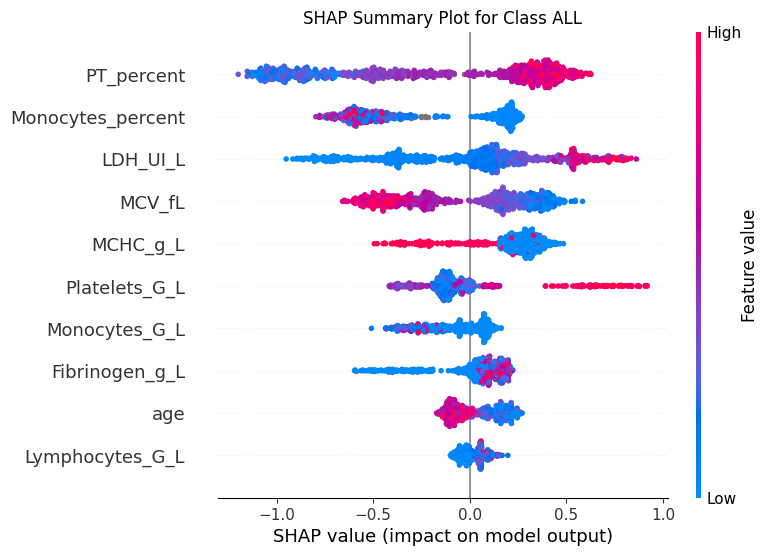

Summary plot for class AML:


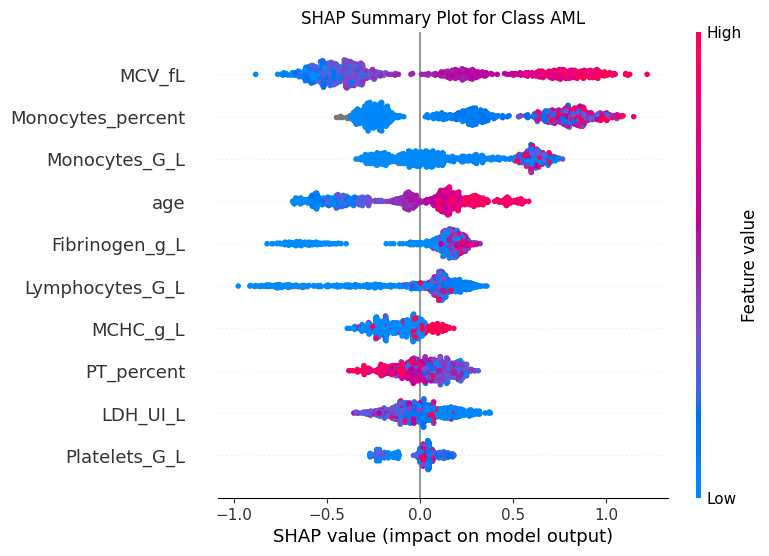

Summary plot for class APL:


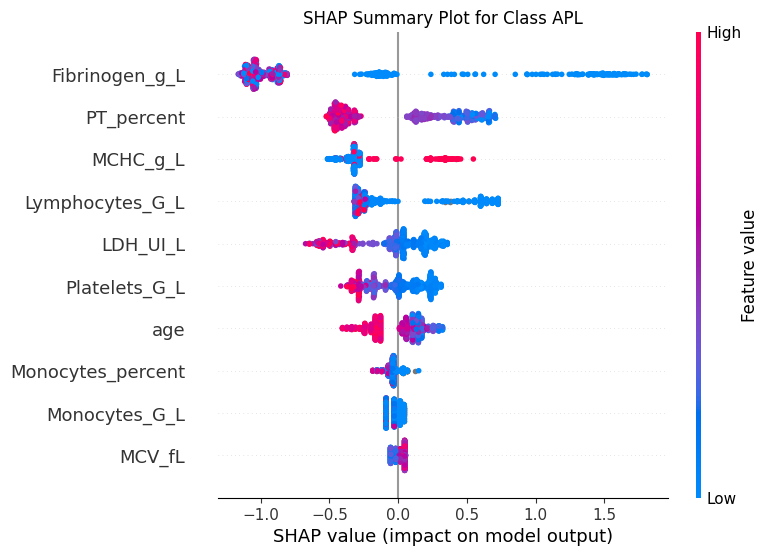

In [70]:
import pandas as pd
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pyplot as plt


# Load the XGBoost model
model = xgb.Booster(model_file='model.json')

# Calculate Monocytes_percent for each row in the DataFrame
df['mono_percent'] = (df['Monocytes_G_L'] * 100) / df['WBC_G_L']

# Reorder features list according to the new order
features = [
    'Fibrinogen_g_L',
    'MCV_fL',
    'Monocytes_percent',  
    'LDH_UI_L',
    'PT_percent',
    'MCHC_g_L',
    'Lymphocytes_G_L',
    'age',
    'Monocytes_G_L',  
    'Platelets_G_L'
]

data_for_prediction = df[features]
dtest = xgb.DMatrix(data_for_prediction)
predictions = model.predict(dtest)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(dtest)
print("Shape of SHAP values:", np.shape(shap_values))

# Aggregate SHAP values by taking the mean over all samples for each class
mean_shap_values = np.mean(shap_values, axis=0)
class_name = {0: 'ALL', 1: 'AML', 2: 'APL'}

# Print the mean SHAP values for each feature by class
for class_index in range(mean_shap_values.shape[1]):
    print(f"Mean SHAP values for class {class_name[class_index]}:")
    for feature_index, feature_name in enumerate(features):
        print(f"{feature_name}: {mean_shap_values[feature_index, class_index]}")

# Init the JavaScript visualization library
shap.initjs()

# Generate summary plots for each class
for class_index in range(mean_shap_values.shape[1]):
    print(f"Summary plot for class {class_name[class_index]}:")
    shap.summary_plot(shap_values[:, :, class_index], data_for_prediction, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_name[class_index]}")
    plt.show()

# Prediction by samples & class

In [71]:
import pandas as pd
import xgboost as xgb
import shap
import numpy as np

# Load the dataset
df = pd.read_csv('/nvme/merengelke/aipal/rome/aipal/predict.csv')

# Load the XGBoost model
model = xgb.Booster(model_file='model.json')

# Features relevant for prediction in the dataset
# Column names in the sample_data DataFrame
features = [
    'MCV_fL',
    'PT_percent',
    'LDH_UI_L',
    'MCHC_g_L',
    'WBC_G_L',
    'Fibrinogen_g_L',
    'Monocytes_G_L',
    'Platelets_G_L',
    'Lymphocytes_G_L',
    'age'
]

# Calculate Monocytes_percent for each row in the DataFrame
df['mono_percent'] = (df['Monocytes_G_L'] * 100) / df['WBC_G_L']

# Select the relevant columns for prediction
data_for_prediction = df[features]

# Convert the DataFrame to DMatrix
dtest = xgb.DMatrix(data_for_prediction)

# Predict using the model
predictions = model.predict(dtest)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(dtest)

# Print the SHAP values for the first prediction as an example
print("SHAP values for the first prediction (class 0):\n", shap_values[0][:, 0])

# Plot the SHAP values for the first prediction as an example
shap.initjs()

# Check the shape of the SHAP values
print("Shape of SHAP values:", np.shape(shap_values))

# Generate the force plot for the first prediction for class 0
if isinstance(explainer.expected_value, list):
    expected_value = explainer.expected_value[0]
else:
    expected_value = explainer.expected_value

# Select SHAP values for class 0
shap_values_class_0 = shap_values[:, :, 0]

# Generate the force plot for the first prediction
shap.force_plot(expected_value, shap_values_class_0[0], data_for_prediction.iloc[0])



SHAP values for the first prediction (class 0):
 [ 0.0962529   0.5201679  -0.57549673 -0.7421343   0.31530368 -0.16494827
 -0.04518512  0.08701994 -0.35516268 -0.01996547]


Shape of SHAP values: (118, 10, 3)
